<a href="https://colab.research.google.com/github/ptndoss/CMPE-257-Machine-Learning-Fake-News-Detection/blob/master/Thirumalai_Nambi_Doss_NELA_GT_18_Mis_information_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 257 Mis-information Detection


Course code : **CMPE-257** 
    
Group name : **Spartans**
    
Name: **Thirumalai Nambi Doss (012674207)** 

NELA-GT-18 
Data Set - https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/ULHLCB




In [0]:
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
from collections import defaultdict
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse
nltk.download('stopwords')
nltk.download('wordnet')
import seaborn as sb
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')


from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Code source: https://degravek.github.io/project-pages/project1/2017/04/28/New-Notebook/
# Dataset from Chakraborty et al. (https://github.com/bhargaviparanjape/clickbait/tree/master/dataset)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


**Sources under consideration for analysis from left to right of political spectrum**

For the project I have considered below sources from NELA GT 18 Data set. I took 2 data from 2 different dates to ensure we have wide variety of data from different sources.


* Left - Gaurdian & CNN 
* Centre - BBC & USA Today
* Right - Fox News & National Review


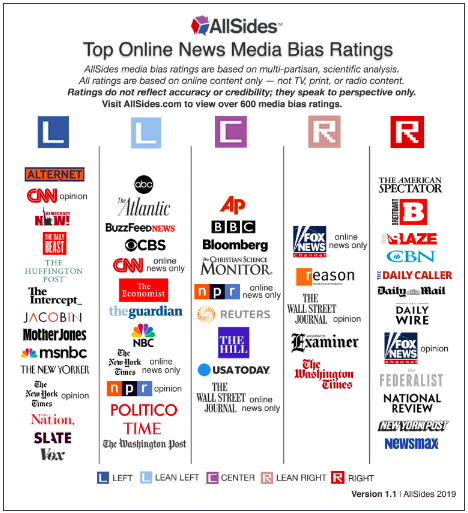


ref - https://www.allsides.com/media-bias/media-bias-ratings

# Read Data from the files

The dataset's articles are also provided in plain-text files, with file-structure and file naming convension:
```
date/
	source/
		<source>--<date>--<title>.txt 
```

* Structure of the content available. Below Data mining script will extract the data and form the CSV and Data frame

# DATA MINING SCRIPT

Below script will read the data from each file and convert them to csv.

Titles and Articles are grouped together along with dates and sources - **'The Guardian','Buzzfeed','CNN','Fox News','National Review'**


In [0]:
from os import walk
from os import listdir
from os.path import isfile, join
import csv

class read_data():
  # Initialize the csv file
  def create_empty_file(self):
      out_file = '/content/drive/My Drive/CMPE257 FinalExam/NELA-GT-2018.csv'
      count = 0
      with open(out_file, mode='w') as empty_file:
          pass

  def data_mining(self, mypath, out_file):
      # mypath = '/home/ptndoss/Downloads/CMPE257MachineLearningFinalExam/articles/2018-11-30/'
      print(mypath)
      print(walk(mypath))
      # out_file = '/content/drive/My Drive/CMPE257 FinalExam/NELA-GT-2018.csv'
      count = 0

      for root, subdirs, files in walk(mypath):
          print('--\n' + root)
          print(subdirs)
          print(len(files))
          # list_file_path = join(root, 'my-directory-list.txt')
          # print('list_file_path = ' + list_file_path)
          count += 1
          # line = root.split('/')
          # line = [x.replace('\n', '') for x in root]
          # line = line[5:]
          for i in range(len(files)):
              file_name = root+'/'+files[i]
              content = self.split_file_name(files[i])
              old_content = content
              file = open(file_name, "r")
              lines = file.readlines()
              article = []
              for line in lines:
                  if line != '\n':
                      line = line.replace('\n','')
                      article.append(line)
                      content.append(article)
                      self.write_to_file(content,out_file)
                      # content = old_content
                      # print(content)
                      article.clear()
                      content.clear()
                      content = self.split_file_name(files[i])

      print("count of files")
      print(count)

  def write_to_file(self, line, out_file):
    with open(out_file, mode='a') as csv_file:
        csv_writer = csv.writer(csv_file, delimiter=',', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow(line)

  def split_file_name(self, file_name):
      out_list = []
      file_name = file_name.split('--')
      file_name = [x.replace('.txt', '') for x in file_name]
      print(file_name)
      return file_name



In [0]:

## Read content from the file for Training and Testing dataset
read = read_data()
read.create_empty_file()
# list of files

# Train Data Set
# Read content from all the sources - "'The Guardian','Buzzfeed','CNN','Fox News','National Review'"

path = '/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/NELA_DataSet/2018-11-30/'
files = ['The Guardian','Buzzfeed','CNN','Fox News','National Review']
out_file = '/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/Processed_CSV/NELA-GT-2018.csv'

for file in files:
  in_file = path + file
  print(in_file)
  read.data_mining(in_file,out_file)

#Test Dataset

# read.data_mining(in_file,out_file)
path = '/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/NELA_DataSet/2018-11-29/'
files = ['The Guardian','Buzzfeed','CNN','Fox News','National Review']
out_file = '/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/Processed_CSV/test_NELA-GT-2018.csv'

for file in files:
  in_file = path + file
  print(in_file)
  read.data_mining(in_file,out_file)


# out_file = '/content/drive/My Drive/CMPE257 FinalExam/test_NELA-GT-2018.csv'
# in_file = '/content/drive/My Drive/CMPE257 FinalExam/2018-11-29/The Guardian'
# read.data_mining(in_file,out_file)

/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/NELA_DataSet/2018-11-30/The Guardian
/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/NELA_DataSet/2018-11-30/The Guardian
<generator object walk at 0x7f57a1ce9200>
--
/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/NELA_DataSet/2018-11-30/The Guardian
[]
12
['The Guardian', '2018-11-30', 'Trump calls Russia deal legal and cool as Mueller inquiry gathers momentum']
['The Guardian', '2018-11-30', 'Trump calls Russia deal legal and cool as Mueller inquiry gathers momentum']
['The Guardian', '2018-11-30', 'Trump calls Russia deal legal and cool as Mueller inquiry gathers momentum']
['The Guardian', '2018-11-30', 'Trump calls Russia deal legal and cool as Mueller inquiry gathers momentum']
['The Guardian', '2018-11-30', 'Trump calls Russia deal legal and cool as Mueller inquiry gathers momentum']
['The Guardian', '2018-11-30'

In [0]:
col_names = ['Source','Date','Title','Article']
df_article = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/Processed_CSV/NELA-GT-2018.csv', names=col_names)
df_article.head()
df_article.Source.unique()

array(['The Guardian', 'Buzzfeed', 'CNN', 'Fox News', 'National Review'],
      dtype=object)

In [0]:
df_article_test = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/Processed_CSV/test_NELA-GT-2018.csv', names=col_names)
df_article_test.head()

,Source,Date,Title,Article
0,The Guardian,2018-11-29,Nancy Pelosi urges Congress to protect Mueller...,['Pelosi said Congress must immediately pass l...
1,The Guardian,2018-11-29,Cliven Bundy rebukes Trump over attack on migr...,['Cliven Bundy is not a fan of walls.']
2,The Guardian,2018-11-29,Cliven Bundy rebukes Trump over attack on migr...,['A hero to some in the far right due to his f...
3,The Guardian,2018-11-29,Cliven Bundy rebukes Trump over attack on migr...,['I really question his doctrine ever since he...
4,The Guardian,2018-11-29,Cliven Bundy rebukes Trump over attack on migr...,['The Bundy family is getting renewed attentio...


In [0]:
df_article.head()

,Source,Date,Title,Article
0,The Guardian,2018-11-30,Trump calls Russia deal legal and cool as Muel...,"['Donald Trump, drawn deeper into an investiga..."
1,The Guardian,2018-11-30,Trump calls Russia deal legal and cool as Muel...,['Trump appeared rattled this week after Micha...
2,The Guardian,2018-11-30,Trump calls Russia deal legal and cool as Muel...,['The surprise admission cast the president hi...
3,The Guardian,2018-11-30,Trump calls Russia deal legal and cool as Muel...,"['In a series of tweets from Buenos Aires, whe..."
4,The Guardian,2018-11-30,Trump calls Russia deal legal and cool as Muel...,"['Against all odds, he continued, I decide to ..."


# Extract lables from lable.csv 

In [0]:
sample = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/NELA_DataSet/labels.csv')
sample.head(5)
sources = ['The Guardian','Buzzfeed','CBS News','CNN','BBC','USA Today','Fox News','National Review']
# label[label['Unnamed: 0'] == sources].head()
df_smpls = sample[sample['Unnamed: 0'].isin(sources)]
df_smpls.rename(columns = {'Unnamed: 0':'Source'}, inplace = True) 
df_smpls

,Source,"NewsGuard, Does not repeatedly publish false content","NewsGuard, Gathers and presents information responsibly","NewsGuard, Regularly corrects or clarifies errors","NewsGuard, Handles the difference between news and opinion responsibly","NewsGuard, Avoids deceptive headlines","NewsGuard, Website discloses ownership and financing","NewsGuard, Clearly labels advertising","NewsGuard, Reveals who's in charge, including any possible conflicts of interest","NewsGuard, Provides information about content creators","NewsGuard, score","NewsGuard, overall_class","Pew Research Center, known_by_40%","Pew Research Center, total","Pew Research Center, consistently_liberal","Pew Research Center, mostly_liberal","Pew Research Center, mixed","Pew Research Center, mostly conservative","Pew Research Center, consistently conservative","Wikipedia, is_fake","Open Sources, reliable","Open Sources, fake","Open Sources, unreliable","Open Sources, bias","Open Sources, conspiracy","Open Sources, hate","Open Sources, junksci","Open Sources, rumor","Open Sources, blog","Open Sources, clickbait","Open Sources, political","Open Sources, satire","Open Sources, state","Media Bias / Fact Check, label","Media Bias / Fact Check, factual_reporting","Media Bias / Fact Check, extreme_left","Media Bias / Fact Check, right","Media Bias / Fact Check, extreme_right","Media Bias / Fact Check, propaganda","Media Bias / Fact Check, fake_news","Media Bias / Fact Check, some_fake_news","Media Bias / Fact Check, failed_fact_checks","Media Bias / Fact Check, conspiracy","Media Bias / Fact Check, pseudoscience","Media Bias / Fact Check, hate_group","Media Bias / Fact Check, anti_islam","Media Bias / Fact Check, nationalism","Allsides, bias_rating","Allsides, community_agree","Allsides, community_disagree","Allsides, community_label","BuzzFeed, leaning","PolitiFact, Pants on Fire!","PolitiFact, False","PolitiFact, Mostly False","PolitiFact, Half-True","PolitiFact, Mostly True","PolitiFact, True"
8,BBC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_center_bias,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Center,7527.0,7177.0,somewhat agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Buzzfeed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_center_bias,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lean Left,3062.0,4197.0,somewhat disagree,NaN,1.0,0.0,0.0,0.0,0.0,0.0
16,CBS News,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_center_bias,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lean Left,4320.0,3857.0,somewhat agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,CNN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_bias,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lean Left,23421.0,24137.0,somewhat disagree,NaN,0.0,0.0,1.0,0.0,0.0,0.0
47,Fox News,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,75.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_bias,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lean Right,18007.0,27420.0,disagree,right,0.0,0.0,1.0,1.0,0.0,0.0
82,National Review,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,right_bias,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Right,6809.0,3300.0,strongly agree,right,0.0,0.0,0.0,0.0,0.0,1.0
146,The Guardian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_center_bias,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lean Left,4434.0,2667.0,agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,USA Today,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0

In [0]:
colnames = ['Unnamed: 0','NewsGuard, score', 'NewsGuard, overall_class','Media Bias / Fact Check, label','Media Bias / Fact Check, factual_reporting','Allsides, community_agree',	'Allsides, community_disagree',	'Allsides, community_label']
names = ['Source','NewsGuard, score', 'NewsGuard, overall_class','Media Bias / Fact Check, label','Media Bias / Fact Check, factual_reporting','Allsides, community_agree',	'Allsides, community_disagree',	'Allsides, community_label']

label = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/NELA_DataSet/labels.csv', usecols=colnames)
label.head(5)
# (label['Unnamed: 0']='The Guardian').head()
sources = ['The Guardian','CNN','BBC','USA Today','Fox News','National Review']
# label[label['Unnamed: 0'] == sources].head()
df_label = label[label['Unnamed: 0'].isin(sources)]
df_label.rename(columns = {'Unnamed: 0':'Source'}, inplace = True) 
df_label.head()
# he Guardian

,Source,"NewsGuard, score","NewsGuard, overall_class","Media Bias / Fact Check, label","Media Bias / Fact Check, factual_reporting","Allsides, community_agree","Allsides, community_disagree","Allsides, community_label"
8,BBC,100.0,1.0,left_center_bias,4.0,7527.0,7177.0,somewhat agree
18,CNN,100.0,1.0,left_bias,3.0,23421.0,24137.0,somewhat disagree
47,Fox News,75.0,1.0,right_bias,3.0,18007.0,27420.0,disagree
82,National Review,100.0,1.0,right_bias,3.0,6809.0,3300.0,strongly agree
146,The Guardian,100.0,1.0,left_center_bias,4.0,4434.0,2667.0,agree


In [0]:
# df_outer = pd.merge(df_article, df_label, on='Source', how='inner')
df_article_with_label = pd.merge(df_article, df_label, on='Source', how='inner')
df_article_with_label.head()

df_article_with_label_test = pd.merge(df_article_test, df_label, on='Source', how='inner')
df_article_with_label_test.head()

# 'Allsides, community_label'

,Source,Date,Title,Article,"NewsGuard, score","NewsGuard, overall_class","Media Bias / Fact Check, label","Media Bias / Fact Check, factual_reporting","Allsides, community_agree","Allsides, community_disagree","Allsides, community_label"
0,The Guardian,2018-11-29,Nancy Pelosi urges Congress to protect Mueller...,['Pelosi said Congress must immediately pass l...,100.0,1.0,left_center_bias,4.0,4434.0,2667.0,agree
1,The Guardian,2018-11-29,Cliven Bundy rebukes Trump over attack on migr...,['Cliven Bundy is not a fan of walls.'],100.0,1.0,left_center_bias,4.0,4434.0,2667.0,agree
2,The Guardian,2018-11-29,Cliven Bundy rebukes Trump over attack on migr...,['A hero to some in the far right due to his f...,100.0,1.0,left_center_bias,4.0,4434.0,2667.0,agree
3,The Guardian,2018-11-29,Cliven Bundy rebukes Trump over attack on migr...,['I really question his doctrine ever since he...,100.0,1.0,left_center_bias,4.0,4434.0,2667.0,agree
4,The Guardian,2018-11-29,Cliven Bundy rebukes Trump over attack on migr...,['The Bundy family is getting renewed attentio...,100.0,1.0,left_center_bias,4.0,4434.0,2667.0,agree


In [0]:
df_article_with_label['Allsides, community_label'].unique()

array(['agree', 'somewhat disagree', 'disagree', 'strongly agree'],
      dtype=object)

# Dump Processed data set as pickle files 

In [0]:
import os.path
NELA_train_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/NELA_DataSet/NELA_train.pkl"
NELA_test_test_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/NELA_DataSet/NELA_test.pkl"
# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop

df_article_with_label.to_pickle(NELA_train_file_name)
df_article_with_label_test.to_pickle(NELA_test_test_file_name)


# Data Cleaning


In [0]:
import re

def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", str(raw_news))
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words ] # if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [0]:
import nltk

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
import time

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
df_article_with_label['clean_article'] = df_article_with_label["Article"].apply(cleaning) 
df_article_with_label['clean_title'] = df_article_with_label["Title"].apply(cleaning) 

df_article_with_label_test['clean_article'] = df_article_with_label_test["Article"].apply(cleaning) 
df_article_with_label_test['clean_title'] = df_article_with_label_test["Title"].apply(cleaning) 

In [0]:
df_article_with_label['clean_article']

0       donald trump drawn deeper into an investig int...
1       trump appear rattl this week after michael coh...
2       the surpris admiss cast the presid himself a a...
3       in a seri of tweet from bueno air where he is ...
4       against all odd he continu i decid to run for ...
                              ...                        
8563    doe more robust fund of say worker train progr...
8564    alon none of these is suffici but the convers ...
8565    the worst case scenario look someth like the h...
8566    do so requir more creativ and le econom determ...
8567    patrick t brown is a graduat student at prince...
Name: clean_article, Length: 8568, dtype: object

In [0]:
# Creating a list of stopwords
stopwords_list = list(stopwords.words('english'))
# stopwords_list

In [0]:
# 'somewhat agree','somewhat disagree','disagree','strongly agree','agree'

def update_lable(label):
  if label == "somewhat disagree" or label == "disagree" or label == "strongly disagree":
    return 0
  elif label == 'strongly agree' or label =='agree' or label == "somewhat agree": 
    return 1

# Visualization

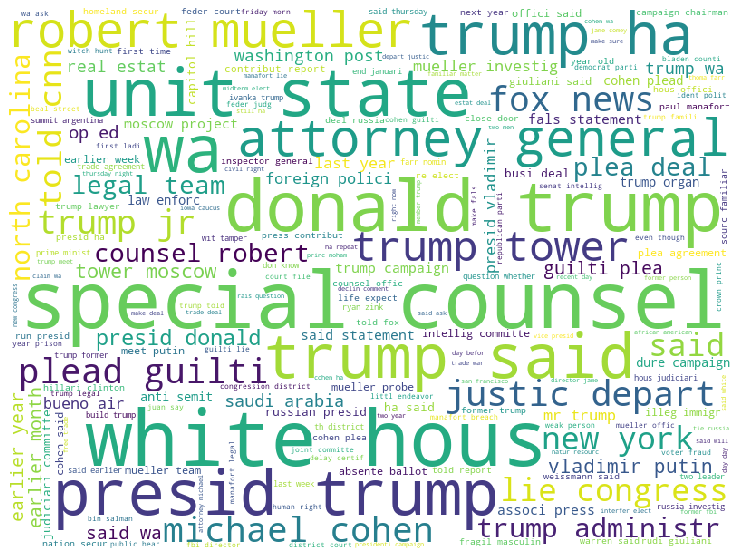

In [0]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(df_article_with_label['clean_article']))

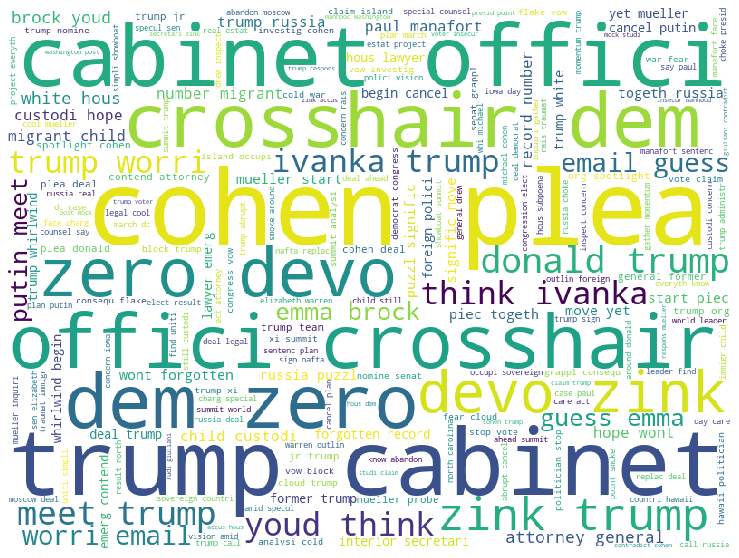

In [0]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(df_article_with_label['clean_title']))

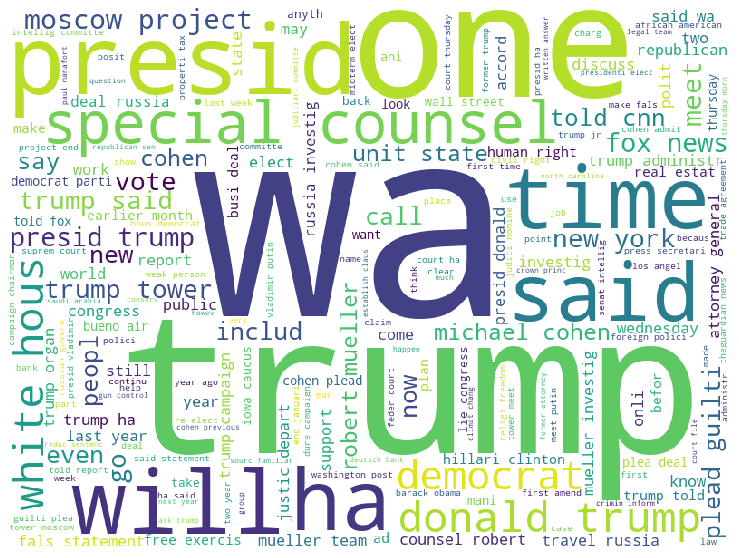

In [0]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(df_article_with_label_test['clean_article']))

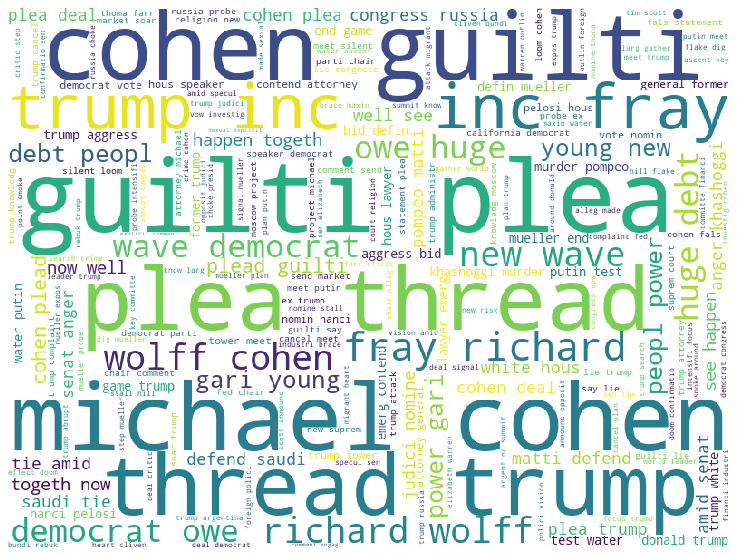

In [0]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(df_article_with_label_test['clean_title']))

# Feature - Neural Micro-patterns-of-Misinformation

## Linguistic analysis based methods

The most effective linguistic analysis method applied to fake news detection is the n-gram approach [1, 2,3]. n-grams are sequences of n contiguous words in a text, constituting words (unigrams) and phrases (bigrams, trigrams) and are widely used in language modeling and text analysis. 

#### N-gram Approach

Neural Micro-patterns-of-Misinformation is one of Linguistic analysis in detecting fake news. Approach is based on "`Mihalcea and Strapparava 2009 proposed the use of n-grams for lie detection.`" Mihalcea and Strapparava trained Naive Bayes and Support
Vector Machine (SVM) classifiers with inputs being the term frequency vectors of n-grams in the texts, after tokenization and stemming but without stop word removal to detect the lies in the statement made.

Here, to detect the micro pattern in each news I am taking similar approach of applying Naive Bayes and SVM over the Term frequency of n-gram in texts.

In [0]:
pip install plotly

In [0]:
from plotly import tools  # to install $ pip install plotly
from plotly.subplots import make_subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [0]:
# Fix for plotly
##only for colab
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()

In [0]:
def update_lable(label):
  if label == "somewhat disagree" or label == "disagree" or label == "strongly disagree":
    return 0
  elif label == 'strongly agree' or label =='agree' or label == "somewhat agree": 
    return 1

In [0]:
df_article_with_label['label'] =  df_article_with_label.apply(lambda x: update_lable(x['Allsides, community_label']),axis=1)
df_article_with_label_test['label'] =  df_article_with_label.apply(lambda x: update_lable(x['Allsides, community_label']),axis=1)

In [0]:
df_article_with_label['label'] 
df_article_with_label_test['label'].dropna(inplace= True)

In [0]:
from collections import defaultdict
df_biased = df_article_with_label[df_article_with_label["label"]==1]
df_unbiased = df_article_with_label[df_article_with_label["label"]!=1]

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Uni Gram - Construct dictionary with every single unique words from the list of words in the news.


In [0]:
configure_plotly_browser_state()
## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in df_unbiased["clean_article"]:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in df_biased["clean_article"]:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of Biased news", 
                                          "Frequent words of Neutral News"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

# plt.figure(figsize=(10,16))
# sns.barplot(x="ngram_count", y="ngram", data=fd_sorted.loc[:50,:], color="b")
# plt.title("Frequent words for Insincere Questions", fontsize=16)
# plt.show()

In [0]:
fd_sorted.head(50)

,word,wordcount
0,wa,582
1,ha,528
2,trump,516
3,u,390
4,said,324
5,year,306
6,right,300
7,american,294
8,state,282
9,life,276


# Tri-Gram - Construct dictionary with every single unique words from the list of words in the news.

In [0]:
# for colab plotly
configure_plotly_browser_state()

freq_dict = defaultdict(int)
for sent in df_unbiased["clean_article"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')


freq_dict = defaultdict(int)
for sent in df_biased["clean_article"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams of Neutral News", 
                                          "Frequent trigrams of biased News"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

In [0]:
fd_sorted.head(10)

,word,wordcount
0,u news nov,24
1,theguardian u news,24
2,declin life expect,18
3,beal street talk,18
4,destruct jewish state,18
5,space small sphere,12
6,creat space small,12
7,american life expect,12
8,best idea found,12
9,violat best idea,12


In [0]:
df_article_with_label_test['label'] 

0       1
1       1
2       1
3       1
4       1
       ..
6171    0
6172    0
6173    0
6174    0
6175    0
Name: label, Length: 6176, dtype: int64

# Visualizing Word vector

In [0]:
import nltk
import re

from gensim.models import word2vec
from sklearn.manifold import TSNE

In [0]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in df_article_with_label["clean_article"].iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
            
    return corpus

In [0]:
corpus = build_corpus(df_article_with_label_test) 

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

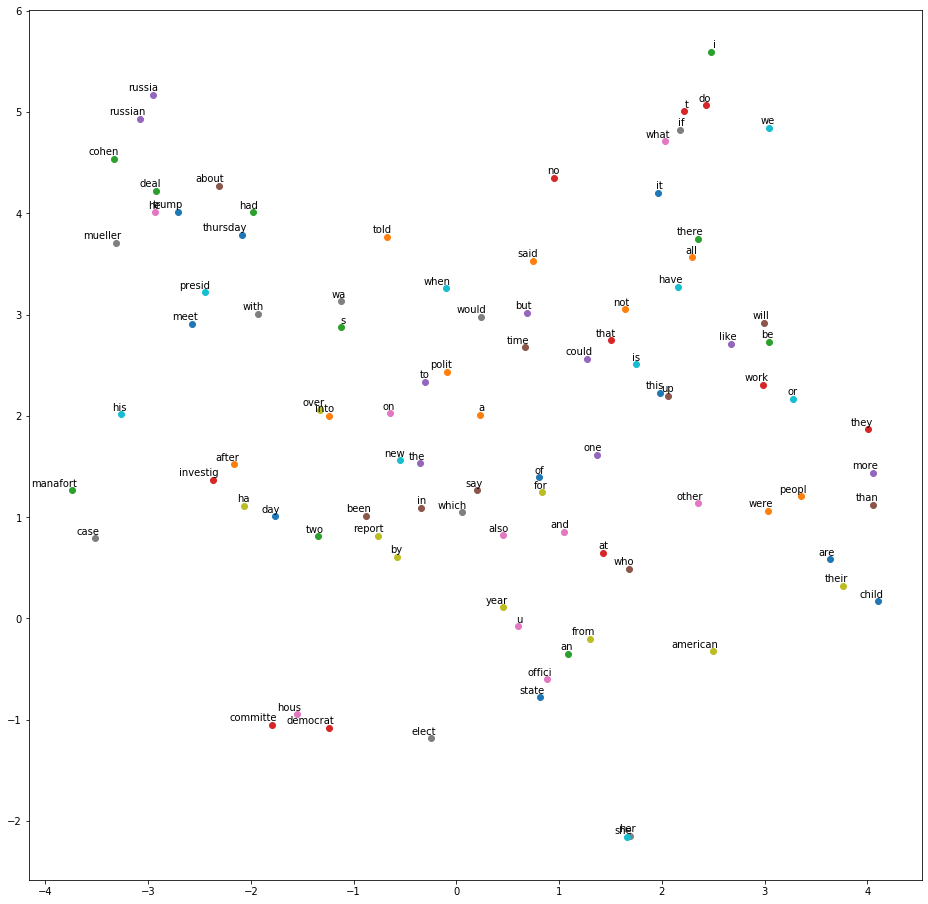

In [0]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

# Support Vector Machine (SVM)
## Apply SVM on the TF-IDF vector with n-gram test against the test news we have in the data set.

In [0]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score)
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     learning_curve)
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [0]:
def show_eval_scores(model, test_data, model_name):
    """Function to show to different evaluation score of the model passed
    on the test set.
    
    Parameters:
    -----------
    model: scikit-learn object
        The model whose scores are to be shown.
    test_set: pandas dataframe
        The dataset on which the score of the model is to be shown.
    model_name: string
        The name of the model.
    """
    y_pred = model.predict(test_data['clean_article'])
    y_true = test_data['label']
    f1 = f1_score(y_true, y_pred, average='micro')
    precision = precision_score(y_true, y_pred, average='micro')
    recall = recall_score(y_true, y_pred, average='micro')
    accuracy = accuracy_score(y_true, y_pred)

    print('Report for ---> {}'.format(model_name))
    print('Accuracy is: {}'.format(accuracy))
    print('F1 score is: {}'.format(f1))
    print('Precision score is: {}'.format(precision))
    print('Recall score is: {}'.format(recall))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [0]:
import pickle
import os.path
pkl_svm_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/misinfo_svm.pkl'
pkl_rf_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/misinfo_rf.pkl'
pkl_nb_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/misinfo_nb.pkl'

# pickle.dump(svm_pipeline, open(pkl_svm_filename, 'wb'))
# pickle.dump(rf_pipeline, open(pkl_rf_filename, 'wb'))
# pickle.dump(nb_pipeline, open(pkl_nb_filename, 'wb'))

In [0]:
if os.path.exists(pkl_svm_filename):
    print ("processed model available as a pickle file for SVM model ")
else:
    svm_pipeline = Pipeline([
    ('svm_TF', TfidfVectorizer(lowercase=True, max_df= 0.7, ngram_range=(1,2 ), use_idf=True, smooth_idf=True))
      ,('svm_clf', SVC(gamma=0.7, kernel='rbf', random_state=20))
    ])
    svm_pipeline.fit(df_article_with_label['clean_article'], df_article_with_label['label'] )
    pickle.dump(svm_pipeline, open(pkl_svm_filename, 'wb'))

processed model available as a pickle file for SVM model 


In [0]:

if os.path.exists(pkl_rf_filename):
    print ("processed model available as a pickle file for Random Forest Model")
else:
    rf_pipeline = Pipeline([
    ('rf_TF', TfidfVectorizer(lowercase=True, ngram_range=(1, 2), use_idf=True, smooth_idf=True)),
    ('rf_clf', RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1))
    ])
    rf_pipeline.fit(df_article_with_label['clean_article'], df_article_with_label['label'] )
    pickle.dump(rf_pipeline, open(pkl_rf_filename, 'wb'))


processed model available as a pickle file for Random Forest Model


In [0]:
if os.path.exists(pkl_nb_filename):
    print ("processed model available as a pickle file for Naive Bayes Model")
else:
    nb_pipeline = Pipeline([
    ('nb_CV', CountVectorizer(ngram_range=(1,2))),
    ('nb_clf', MultinomialNB(alpha=6.5))
    ])
    nb_pipeline.fit(df_article_with_label['clean_article'], df_article_with_label['label'])
    pickle.dump(nb_pipeline, open(pkl_nb_filename, 'wb'))

processed model available as a pickle file for Naive Bayes Model


In [0]:
pkl_svm_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/misinfo_svm.pkl'
pkl_rf_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/misinfo_rf.pkl'
pkl_nb_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/misinfo_nb.pkl'
pkl_NELA_train_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/NELA_DataSet/NELA_train.pkl"
pkl_NELA_test_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/NELA_DataSet/NELA_test.pkl"


In [0]:
# import pickle
class NELA_mis_information():

  def __init__(self):
    print("Initializing")
    pkl_svm_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/misinfo_svm.pkl'
    pkl_rf_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/misinfo_rf.pkl'
    pkl_nb_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/misinfo_nb.pkl'
    pkl_NELA_train_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/NELA_DataSet/NELA_train.pkl"
    pkl_NELA_test_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/NELA_DataSet/NELA_test.pkl"

  def load_NELA_train_data(self):
    # Load the dataset
    df_train_data = pd.read_pickle(pkl_NELA_train_file_name)
    print(df_train_data)
    return df_train_data
  
  def load_NELA_test_data(self):
    # Load the dataset
    df_test_data = pd.read_pickle(pkl_NELA_test_file_name)
    return df_test_data

  def predict(self):
    loaded_model = pickle.load(open(pkl_svm_filename, 'rb'))
    result = loaded_model.score(df_article_with_label['Article'], df_article_with_label['label'])
    print('Support Vector Machine Result')
    print(result)

    loaded_model = pickle.load(open(pkl_rf_filename, 'rb'))
    # loaded_model.predict
    result = loaded_model.score(df_article_with_label['Article'], df_article_with_label['label'])
    print('Random Forest Result')
    print(result)

    loaded_model = pickle.load(open(pkl_nb_filename, 'rb'))
    result = loaded_model.score(df_article_with_label['Article'], df_article_with_label['label'])
    print('Naive Bayes Result')
    print(result)

  def predict_svm(self, train_data, pkl_svm_filename):
    loaded_model = pickle.load(open(pkl_svm_filename, 'rb'))
    test_data = self.load_NELA_test_data()
    y_predict = loaded_model.predict(test_data['clean_article'])
    result = loaded_model.score(df_article_with_label['Article'], df_article_with_label['label'])
    print('Support Vector Machine Result')
    print(result)

    self.show_eval_scores(y_predict, test_data, "Support Vector Machine")
   
  def predict_rf(self, train_data, pkl_rf_filename):
    loaded_model = pickle.load(open(pkl_rf_filename, 'rb'))
    test_data = self.load_NELA_test_data()
    y_predict = loaded_model.predict(test_data['clean_article'])
    result = loaded_model.score(df_article_with_label['Article'], df_article_with_label['label'])
    print('Random Forest Result')
    
    print(result)
    self.show_eval_scores(y_predict, test_data, "Random Forest Model")
  
  def predict_nb(self, train_data, pkl_nb_filename):
    loaded_model = pickle.load(open(pkl_nb_filename, 'rb'))
    test_data = self.load_NELA_test_data()
    y_predict = loaded_model.predict(test_data['clean_article'])
    result = loaded_model.score(df_article_with_label['Article'], df_article_with_label['label'])
    print('Naive Bayes Result')
    print(result)
    self.show_eval_scores(y_predict, test_data, "Naive Bayes")


  def show_eval_scores(self, y_pred, test_data, model_name):
    """Function to show to different evaluation score of the model passed
    on the test set.
    
    Parameters:
    -----------
    model: scikit-learn object
        The model whose scores are to be shown.
    test_set: pandas dataframe
        The dataset on which the score of the model is to be shown.
    model_name: string
        The name of the model.
    """
    # y_pred = model.predict(test_data['result_clean_text'])
    y_true = test_data['label']
    f1 = f1_score(y_true, y_pred, average='micro')
    precision = precision_score(y_true, y_pred, average='micro')
    recall = recall_score(y_true, y_pred, average='micro')
    accuracy = accuracy_score(y_true, y_pred)

    print('Report for ---> {}'.format(model_name))
    print('Accuracy is: {}'.format(accuracy))
    print('F1 score is: {}'.format(f1))
    print('Precision score is: {}'.format(precision))
    print('Recall score is: {}'.format(recall))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')




In [0]:
mis_info = NELA_mis_information()
mis_info.predict()
# predict_rf(df_article_with_label,pkl_svm_filename)

Initializing
Support Vector Machine Result
0.9838935574229691
Random Forest Result
0.7549019607843137
Naive Bayes Result
0.9439775910364145


In [0]:
# mis_info.predict_nb(df_article_with_label,pkl_rf_filename)

In [0]:
svm_pipeline = Pipeline([
('svm_TF', TfidfVectorizer(lowercase=True, max_df= 0.7, ngram_range=(1,2 ), use_idf=True, smooth_idf=True))
  ,('svm_clf', SVC(gamma=0.7, kernel='rbf', random_state=20))
])
svm_pipeline.fit(df_article_with_label['clean_article'], df_article_with_label['label'] )

Pipeline(memory=None,
         steps=[('svm_TF',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svm_clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=

Report for ---> SVM Classifier TFIDF Vectorizer
Accuracy is: 1.0
F1 score is: 1.0
Precision score is: 1.0
Recall score is: 1.0


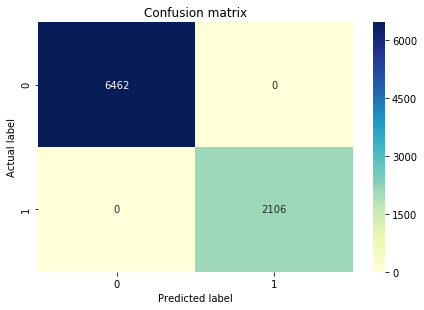

In [0]:
show_eval_scores(svm_pipeline,df_article_with_label, 'SVM Classifier TFIDF Vectorizer')

# Naive Bayes Algorithm

Applie probablistic algorithm on the dataset

Report for ---> Naive Bayes TFIDF Vectorizer
Accuracy is: 0.9740896358543417
F1 score is: 0.9740896358543417
Precision score is: 0.9740896358543417
Recall score is: 0.9740896358543417


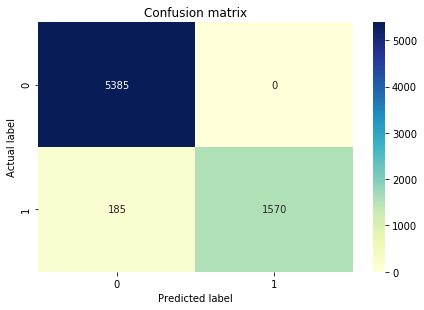

In [0]:
show_eval_scores(nb_pipeline,df_article_with_label, 'Naive Bayes TFIDF Vectorizer')

# Random Forest Algorithm

In [0]:
rf_pipeline = Pipeline([
('rf_TF', TfidfVectorizer(lowercase=True, ngram_range=(1, 2), use_idf=True, smooth_idf=True)),
('rf_clf', RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1))
])
rf_pipeline.fit(df_article_with_label['clean_article'], df_article_with_label['label'] )


Pipeline(memory=None,
         steps=[('rf_TF',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                ('rf_clf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=15,
                                        max_features='auto',
                                        max_leaf_nodes=None,
      

Report for ---> Random Forest TFIDF Vectorizer
Accuracy is: 0.8095238095238095
F1 score is: 0.8095238095238095
Precision score is: 0.8095238095238095
Recall score is: 0.8095238095238095


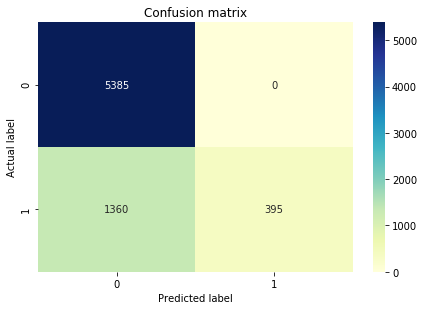

In [0]:
show_eval_scores(rf_pipeline,df_article_with_label, 'Random Forest TFIDF Vectorizer')

# Sensational Analysis

In [0]:
df_article_with_label.columns

Index(['Source', 'Date', 'Title', 'Article', 'NewsGuard, score',
       'NewsGuard, overall_class', 'Media Bias / Fact Check, label',
       'Media Bias / Fact Check, factual_reporting',
       'Allsides, community_agree', 'Allsides, community_disagree',
       'Allsides, community_label', 'clean_article', 'clean_title', 'label'],
      dtype='object')

In [0]:
corpus = []
for i in df_article_with_label['clean_article']:
    corpus.append(i)
# corpus

sensational_corpus=[]
sensational_words = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/sensational_words_dict.csv', sep="\t+", header=None, usecols=[0] )
print(len(sensational_words))
sensational_dictionary = ' '.join(sensational_words[0].astype(str))
sensational_corpus.append(sensational_dictionary)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



1443


In [0]:
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")
sentic_net = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/senticnet5.txt', sep="\t+", header=None, usecols=[0,1,2], names = ["Token", "Polarity", "Intensity"])
sentic_net = sentic_net[~sentic_net['Token'].str.contains('|'.join('_'),na=False)]
sentic_net = sentic_net.reset_index(drop=True)
print("Senticnet Vocab Size: ",len(sentic_net))
print(sentic_net.head(10))

Senticnet Vocab Size:  39891
         Token  Polarity  Intensity
0      abandon  negative      -0.84
1    abandoned  negative      -0.85
2  abandonment  negative      -0.82
3        abase  negative      -0.90
4    abasement  negative      -0.90
5        abash  negative      -0.77
6      abashed  negative      -0.92
7    abashment  negative      -0.76
8       abasia  negative      -0.67
9        abate  negative      -0.86


In [0]:

# sentic_net['Token'] provides list of words from the SenticNet DICTIONARY
senti_pos = sentic_net.loc[sentic_net.Polarity == "positive"]
senti_pos = senti_pos.loc[senti_pos.Intensity > 0.90]
dictionary = ' '.join(senti_pos.Token.astype(str))
sensational_corpus.append(dictionary)
print(len(senti_pos))

2040


# TF - IDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVec = TfidfVectorizer(max_features=1000)

tfidf_corpus = tfidfVec.fit_transform(corpus)
tf_idf_senti = tfidfVec.fit_transform(sensational_corpus)
words = tfidfVec.get_feature_names()

In [0]:
tfidf_corpus.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14944937, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
tf_idf_senti.toarray()

array([[0.02934579, 0.05869158, 0.05869158, ..., 0.        , 0.        ,
        0.08803737],
       [0.        , 0.        , 0.        , ..., 0.19269152, 0.06423051,
        0.        ]])

In [0]:
tfidfVec.vocabulary_

{'absolutely': 1,
 'advantage': 3,
 'qaeda': 742,
 'amazing': 4,
 'antagonistic': 6,
 'attack': 14,
 'authentic': 15,
 'authority': 16,
 'banned': 21,
 'behind': 24,
 'the': 929,
 'scenes': 881,
 'best': 26,
 'bill': 28,
 'bitterness': 29,
 'black': 31,
 'market': 187,
 'blacklisted': 32,
 'blissful': 34,
 'up': 990,
 'breathtaking': 37,
 'campaign': 40,
 'for': 95,
 'censored': 42,
 'cheer': 44,
 'cheerful': 45,
 'church': 47,
 'class': 48,
 'concealed': 52,
 'confessions': 53,
 'confidential': 55,
 'control': 59,
 'controversial': 61,
 'cost': 62,
 'cover': 63,
 'crime': 64,
 'critical': 65,
 'infrastructure': 126,
 'cyber': 67,
 'security': 886,
 'terror': 928,
 'daring': 68,
 'of': 388,
 'desire': 71,
 'disastrous': 72,
 'drug': 76,
 'ecstatic': 79,
 'on': 409,
 'emergency': 81,
 'response': 859,
 'enforcement': 83,
 'eye': 85,
 'opening': 415,
 'faith': 86,
 'faithfulness': 87,
 'fbi': 89,
 'first': 93,
 'responder': 858,
 'high': 118,
 'forbidden': 96,
 'force': 97,
 'fire': 92,


In [0]:
train_tfidf = tfidfVec.fit_transform(df_article_with_label['clean_article'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])


test_tfidf = tfidfVec.fit_transform(df_article_with_label_test['clean_article'])
print('Test dim:', test_tfidf.shape)
print(test_tfidf.A[:10])


# valid_tfidf = tfidfVec.fit_transform(valid_news['clean'])
# print('Valid dim:', valid_tfidf.shape)
# print(valid_tfidf.A[:10])

Training dim: (7140, 1000)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.14944937 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.12414071 0.         0.         ... 0.         0.         0.        ]
 [0.11421768 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Test dim: (4632, 1000)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10855313 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [0]:
# from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
similarity_score = []
for i in range(len(train_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))

In [0]:
df_article_with_label['sensational_score'] = similarity_score
df_article_with_label.head(5)

,Source,Date,Title,Article,"NewsGuard, score","NewsGuard, overall_class","Media Bias / Fact Check, label","Media Bias / Fact Check, factual_reporting","Allsides, community_agree","Allsides, community_disagree","Allsides, community_label",clean_article,clean_title,label,sensational_score
0,The Guardian,2018-11-30,Trump calls Russia deal legal and cool as Muel...,"['Donald Trump, drawn deeper into an investiga...",100.0,1.0,left_center_bias,4.0,4434.0,2667.0,agree,donald trump drawn deeper into an investig int...,trump call russia deal legal and cool a muelle...,1,0.094363
1,The Guardian,2018-11-30,Trump calls Russia deal legal and cool as Muel...,['Trump appeared rattled this week after Micha...,100.0,1.0,left_center_bias,4.0,4434.0,2667.0,agree,trump appear rattl this week after michael coh...,trump call russia deal legal and cool a muelle...,1,0.107214
2,The Guardian,2018-11-30,Trump calls Russia deal legal and cool as Muel...,['The surprise admission cast the president hi...,100.0,1.0,left_center_bias,4.0,4434.0,2667.0,agree,the surpris admiss cast the presid himself a a...,trump call russia deal legal and cool a muelle...,1,0.088345
3,The Guardian,2018-11-30,Trump calls Russia deal legal and cool as Muel...,"['In a series of tweets from Buenos Aires, whe...",100.0,1.0,left_center_bias,4.0,4434.0,2667.0,agree,in a seri of tweet from bueno air where he is ...,trump call russia deal legal and cool a muelle...,1,0.151073
4,The Guardian,2018-11-30,Trump calls Russia deal legal and cool as Muel...,"['Against all odds, he continued, I decide to ...",100.0,1.0,left_center_bias,4.0,4434.0,2667.0,agree,against all odd he continu i decid to run for ...,trump call russia deal legal and cool a muelle...,1,0.114027


In [0]:
corpus = []
for i in df_article_with_label_test['clean_article']:
    corpus.append(i)
# corpus

tfidf_corpus = tfidfVec.fit_transform(corpus)

similarity_score = []
for i in range(len(test_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))
    
df_article_with_label_test['sensational_score'] = similarity_score
df_article_with_label_test.head(5)

,Source,Date,Title,Article,"NewsGuard, score","NewsGuard, overall_class","Media Bias / Fact Check, label","Media Bias / Fact Check, factual_reporting","Allsides, community_agree","Allsides, community_disagree","Allsides, community_label",clean_article,clean_title,label,sensational_score
0,The Guardian,2018-11-29,Nancy Pelosi urges Congress to protect Mueller...,['Pelosi said Congress must immediately pass l...,100.0,1.0,left_center_bias,4.0,4434.0,2667.0,agree,pelosi said congress must immedi pas legisl bu...,nanci pelosi urg congress to protect mueller i...,1,0.045824
1,The Guardian,2018-11-29,Cliven Bundy rebukes Trump over attack on migr...,['Cliven Bundy is not a fan of walls.'],100.0,1.0,left_center_bias,4.0,4434.0,2667.0,agree,cliven bundi is not a fan of wall,cliven bundi rebuk trump over attack on migran...,1,0.027009
2,The Guardian,2018-11-29,Cliven Bundy rebukes Trump over attack on migr...,['A hero to some in the far right due to his f...,100.0,1.0,left_center_bias,4.0,4434.0,2667.0,agree,a hero to some in the far right due to his fam...,cliven bundi rebuk trump over attack on migran...,1,0.093343
3,The Guardian,2018-11-29,Cliven Bundy rebukes Trump over attack on migr...,['I really question his doctrine ever since he...,100.0,1.0,left_center_bias,4.0,4434.0,2667.0,agree,i realli question his doctrin ever sinc he sta...,cliven bundi rebuk trump over attack on migran...,1,0.113037
4,The Guardian,2018-11-29,Cliven Bundy rebukes Trump over attack on migr...,['The Bundy family is getting renewed attentio...,100.0,1.0,left_center_bias,4.0,4434.0,2667.0,agree,the bundi famili is get renew attent this week...,cliven bundi rebuk trump over attack on migran...,1,0.133092


In [0]:

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Imputer


class SensationalismFeature():

    def __init__(self):        
        self.load_data()
            
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df = 30, use_idf = True, smooth_idf = True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf', LogisticRegression(solver='liblinear', C = 32/100))
                ])

        self.logR_pipeline.fit(df_article_with_label['clean_article'], df_article_with_label['sensational_score'].astype(str))
        predicted_LogR = self.logR_pipeline.predict(df_article_with_label_test['clean_article'])
        score = metrics.accuracy_score(df_article_with_label_test['sensational_score'].astype(str), predicted_LogR)
        
    def load_data(self):
        col_names = ['Source','Date','Title','Article']
        df_article = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/Processed_CSV/NELA-GT-2018.csv', names=col_names)

        colnames = ['Unnamed: 0','NewsGuard, score', 'NewsGuard, overall_class','Media Bias / Fact Check, label','Media Bias / Fact Check, factual_reporting','Allsides, community_agree',	'Allsides, community_disagree',	'Allsides, community_label']
        names = ['Source','NewsGuard, score', 'NewsGuard, overall_class','Media Bias / Fact Check, label','Media Bias / Fact Check, factual_reporting','Allsides, community_agree',	'Allsides, community_disagree',	'Allsides, community_label']

        label = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/NELA_DataSet/labels.csv', usecols=colnames)
        # (label['Unnamed: 0']='The Guardian').head()
        sources = ['The Guardian','CNN','BBC','USA Today','Fox News','National Review']
        # label[label['Unnamed: 0'] == sources].head()
        df_label = label[label['Unnamed: 0'].isin(sources)]
        df_label.rename(columns = {'Unnamed: 0':'Source'}, inplace = True) 

        df_article_with_label = pd.merge(df_article, df_label, on='Source', how='inner')



    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
sf = SensationalismFeature()
sf.predict("The great unraveling has begun. Between the latest guilty plea by Donald Trumps fixer and the breakdown of a guilty plea by his campaign chairman, the threads are fraying on the scheming enterprise that is Trump Inc.")

(True, 0.0007183034560337024)

In [0]:
def getSensationalismScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = sf.predict(text)
    return (float(probValue*100))

print(getSensationalismScore("The great unraveling has begun. Between the latest guilty plea by Donald Trumps fixer and the breakdown of a guilty plea by his campaign chairman, the threads are fraying on the scheming enterprise that is Trump Inc."))
print(getSensationalismScore("President Donald Trump boasted on Wednesday of drawing a record TV audience for his State of the Union address, but ratings show he was beaten by Barack Obama's maiden speech in 2o10."))
print(getSensationalismScore("Thank you for all of the nice compliments and reviews on the State of the Union speech. 45.6 million people watched, the highest number in history. FoxNews beat every other Network, for the first time ever, with 11.7 million people tuning in. Delivered from the heart!"))


0.07183034560337025
0.07176071577743767
0.07165556752838262
